In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200610_P200_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200610_P200

## Si II 6355

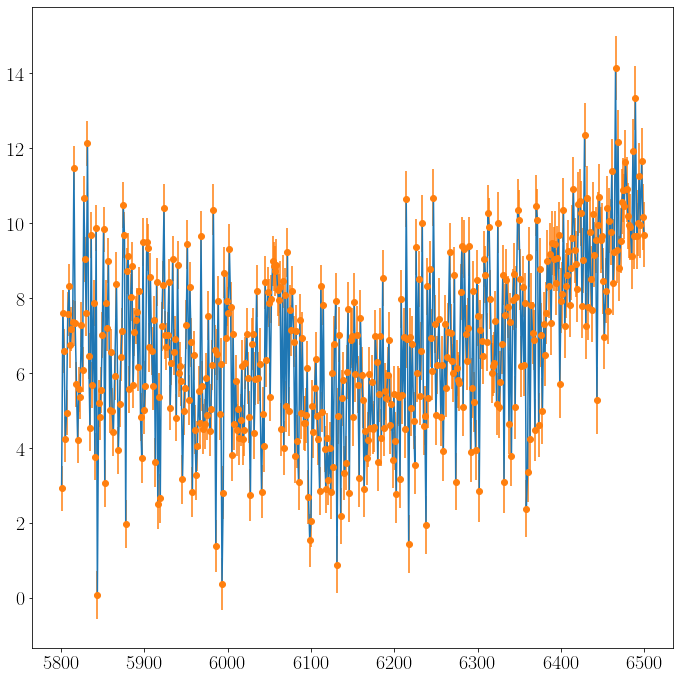

In [4]:
Spec1.plot_line_region(5800, 6500)

In [ ]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

In [ ]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

<AxesSubplot:>

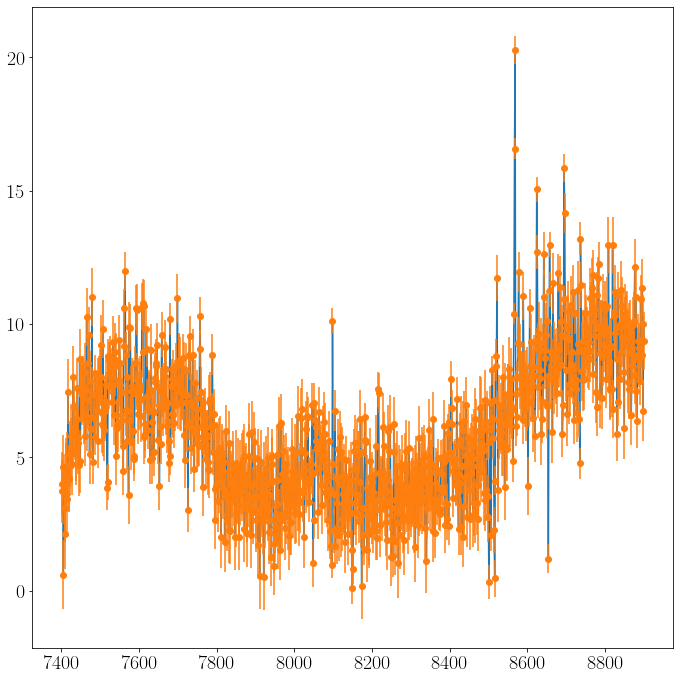

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7500,
               8800,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

LS estimation:
Velocity 1: -23562 km/s
Velocity 2: -9586 km/s


Normalize factor = 2.299


100%|███████████████████████████████████████| 1000/1000 [00:19<00:00, 52.03it/s]


MCMC results:
Velocity 1: -23595 pm 577 km/s
Velocity 2: -9592 pm 413 km/s
Normalize factor = 2.300


  9%|███▍                                  | 4500/50000 [01:26<14:30, 52.25it/s]

MCMC results:
Velocity 1: -23590 pm 474 km/s
Velocity 2: -9572 pm 464 km/s


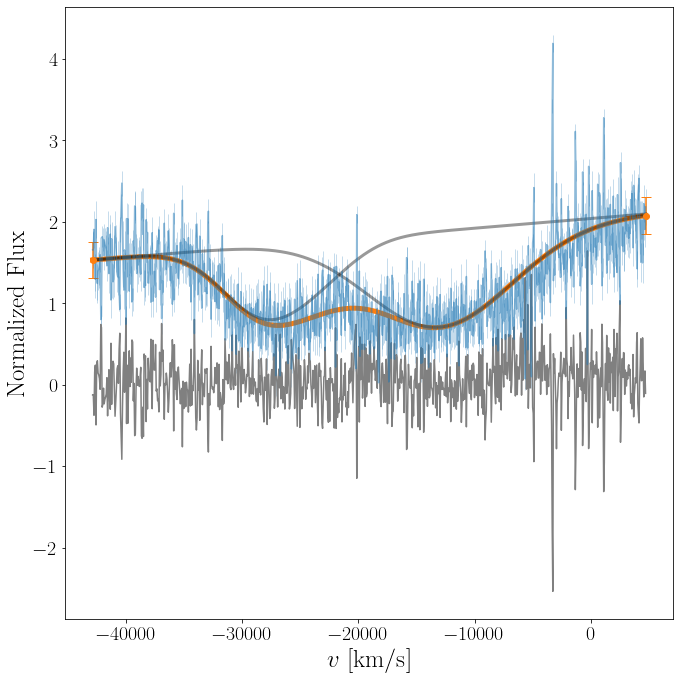

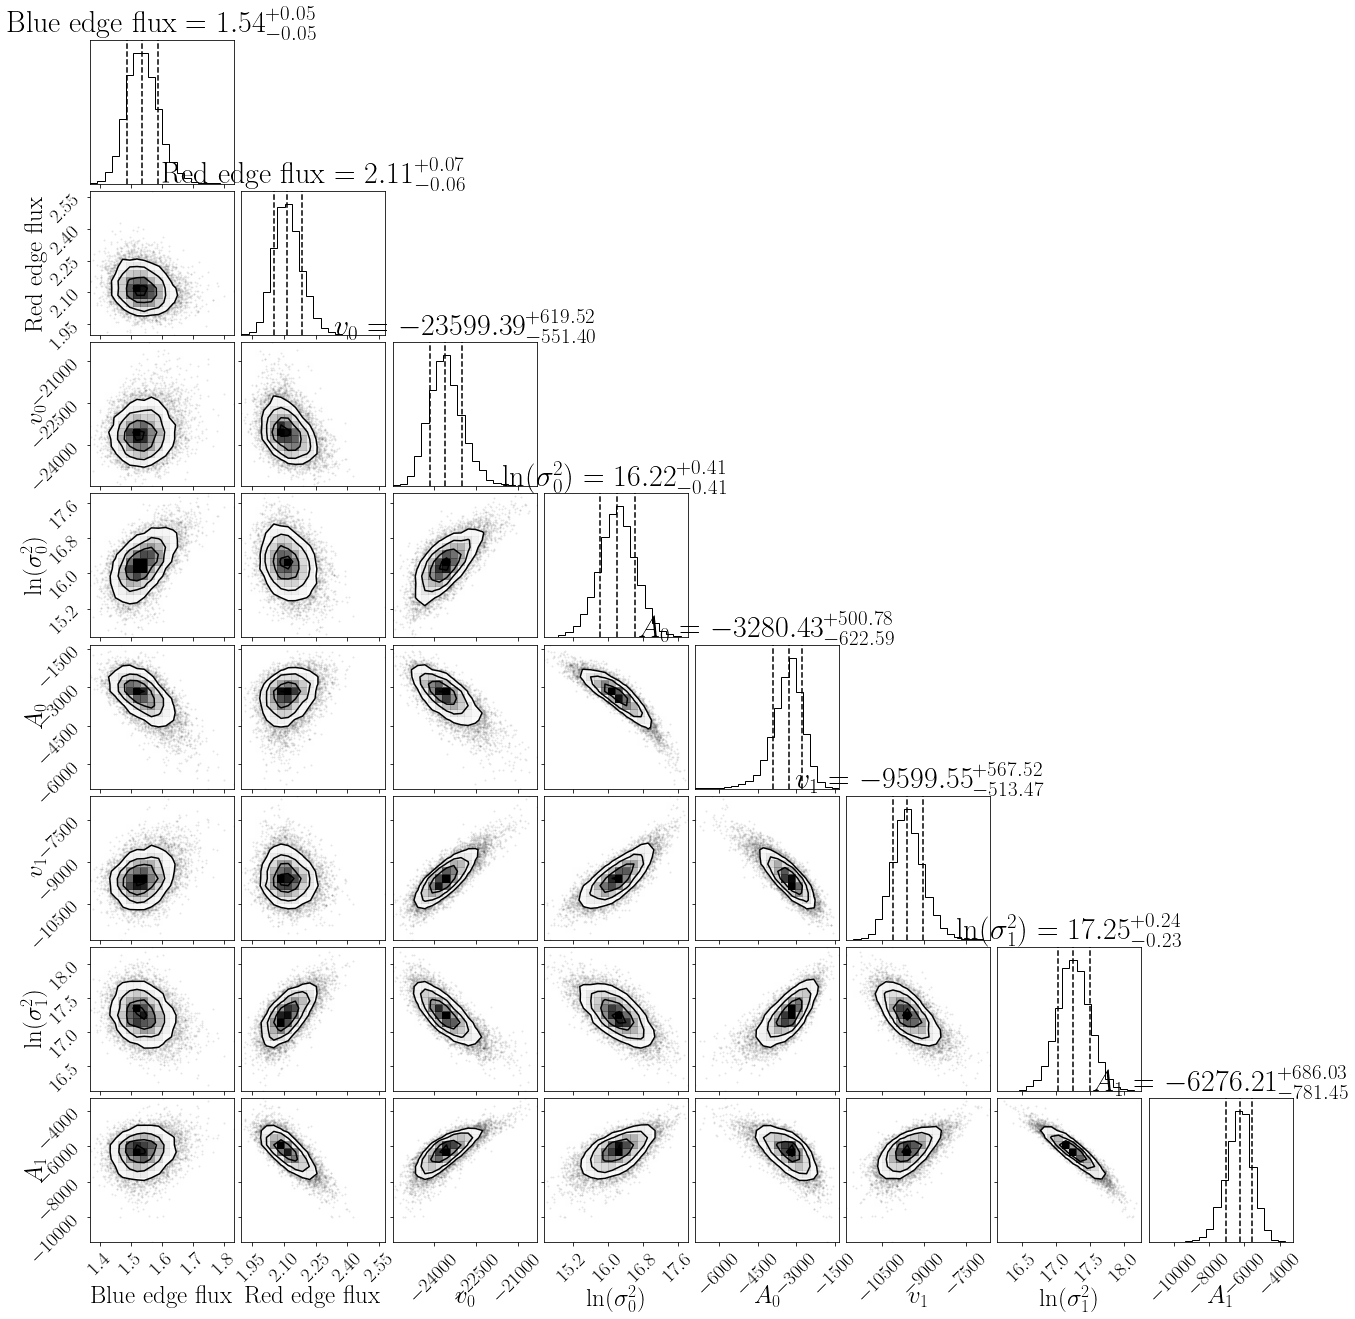

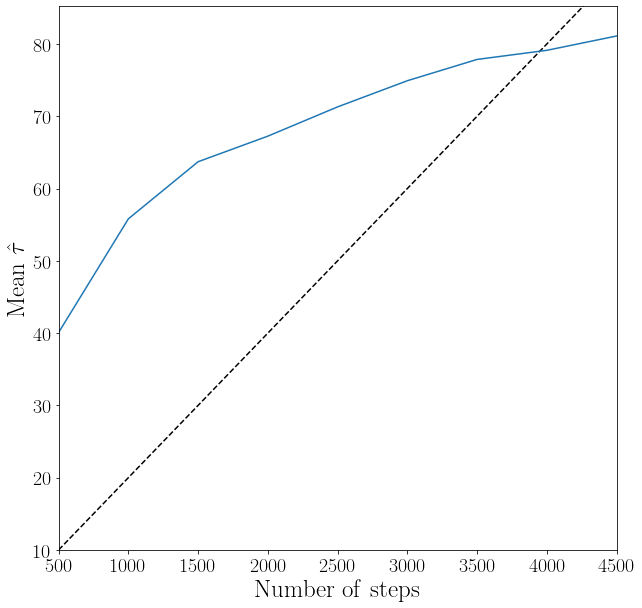

In [5]:
mu1 = -24000
mu2 = -11000
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=[1, 1, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['CaII_IRT/CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)